<a href="https://colab.research.google.com/github/EmaSuriano/pytorch-demo/blob/main/entrega/Proyecto%20pr%C3%A1ctico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico

> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.

*   Alumno 1: José Fernández López
*   Alumno 2: Julio Emanuel Suriano Bryk
*   Alumno 3: Wilmer Patricio Pujos Castro
*   Alumno 4: Fernando Javier Vera Pérez

Nombre de grupo: Grupo_gc_7

---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/actividades/proyecto practico
/content/gdrive/My Drive/actividades/proyecto practico
Archivos en el directorio: 
['dqn_SpaceInvaders-v0_weights.h5f.data-00000-of-00001', 'dqn_SpaceInvaders-v0_weights.h5f.index', 'checkpoint', 'dqn_SpaceInvaders-v0_log.json', 'final', 'output_video.avi']


---
### 1.4. Instalar librerías necesarias

In [3]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.8
  %pip install protobuf==3.20.0
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0
  %pip install matplotlib==3.6
  %pip install protobuf==3.20.0

  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-nbed7lrj
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-nbed7lrj
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [4]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, LSTM, Reshape, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy, MaxBoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [8]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

print(f"Hay {nb_actions} acciones:")

action_meanings = env.env.get_action_meanings()
for i, action in enumerate(action_meanings):
    print(f"  {i}: {action}")

Hay 6 acciones:
  0: NOOP
  1: FIRE
  2: RIGHT
  3: LEFT
  4: RIGHTFIRE
  5: LEFTFIRE


#### Helpers

In [51]:
# Función para mostrar los resultados de los episodios
def plot_results(episode_rewards, threshold=20):
  average_rewards = np.cumsum(episode_rewards) / (np.arange(len(episode_rewards)) + 1)

  plt.plot(episode_rewards, label='Recompensa Episodio')
  plt.plot(average_rewards, label='Promedio de Recompensa', linestyle='dashed')
  plt.axhline(y=20, color='r', linestyle='--', label=f'Objetivo ({threshold} Recompensas)')


  plt.xlabel('Episodio')
  plt.ylabel('Recompensa')
  plt.title(f'Resultados para {len(episode_rewards)} Episodios')

  plt.legend()
  plt.show()

In [13]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        # Cortamos la observación para eliminar el score
        # de arriba y el suelo de abajo
        observation_cropped = observation[28:-14,4:-12]
        # Convert observation to gray
        img = Image.fromarray(observation_cropped)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [14]:
# Modificamos la classe EpsGreedyQPolicy para hacer que el epsilon
# decaiga de 1 a 0.1 a lo largo de los 100 primeros intervalos.

class EpsGreedyQPolicy(EpsGreedyQPolicy):
    def __init__(self, eps=.1, eps_update=10000):
        super().__init__(eps)
        self.current_step = 0
        self.eps_update = eps_update


    def select_action(self, q_values):
        self.current_step += 1
        if not self.current_step % self.eps_update:
            self.eps -= 0.02
            if self.eps < .1:
                self.eps = .1
        return super().select_action(q_values)

#### Test del entorno

In [47]:
def test_env(episodes = 5):
    scores = []

    for _ in range(episodes):
        observation = env.reset()
        done = False
        score = 0

        while not done:
            action = env.action_space.sample()
            observation, reward, done, info = env.step(action)

            # Aplicamos clip a la recompensa
            score += np.clip(reward, -1., 1.)

        scores.append(score)
        env.close()

    return scores

episode_rewards = test_env(10)

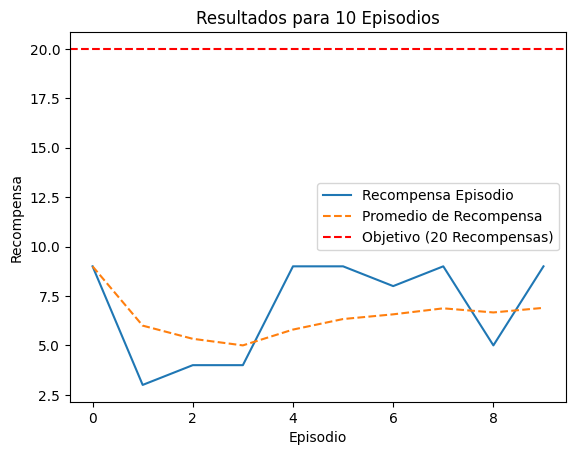

In [52]:
# Plot de los resultados del test del entorno
plot_results(episode_rewards)

#### 1. Implementación de la red neuronal

In [15]:
# Construimos el modelo utilizando la misma estructura de Mnih et al. (2015).
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
print(K.image_data_format())
if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (3, 3), strides=(3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

channels_last
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        1184      
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                          

#### 2. Implementación de la solución DQN

In [16]:
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [17]:
policy = LinearAnnealedPolicy(
    EpsGreedyQPolicy(eps=1.0),
    attr='eps',
    value_max=1.,
    value_min=.1,
    value_test=.05,
    nb_steps=1000000
)
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy,
               memory=memory, processor=processor,
               # nb_steps_warmup=50000, No hace falta por la modificación en la policy
               gamma=.97,
               target_model_update=10000,
               train_interval=WINDOW_LENGTH)
dqn.compile(Adam(learning_rate=.00025), metrics=['mae'])

In [ ]:
# Training part
weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
checkpoint_weights_filename = 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = 'dqn_{}_log.json'.format(env_name)
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=2000000, log_interval=10000, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

Training for 2000000 steps ...
Interval 1 (0 steps performed)
   38/10000 [..............................] - ETA: 27s - reward: 0.0000e+00

C:\Users\Roger\.conda\envs\miar_rl\lib\site-packages\tensorflow\python\keras\engine\training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10000/10000 [==============================] - 174s 17ms/step - reward: 0.0139
15 episodes - episode_reward: 8.867 [3.000, 22.000] - loss: 0.006 - mae: 0.037 - mean_q: 0.074 - mean_eps: 0.995 - ale.lives: 2.133

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 191s 19ms/step - reward: 0.0141
12 episodes - episode_reward: 11.333 [5.000, 22.000] - loss: 0.006 - mae: 0.061 - mean_q: 0.098 - mean_eps: 0.987 - ale.lives: 2.024

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 191s 19ms/step - reward: 0.0136
16 episodes - episode_reward: 8.750 [4.000, 19.000] - loss: 0.007 - mae: 0.099 - mean_q: 0.136 - mean_eps: 0.978 - ale.lives: 2.206

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 192s 19ms/step - reward: 0.0139
15 episodes - episode_reward: 9.467 [4.000, 28.000] - loss: 0.006 - mae: 0.101 - mean_q: 0.136 - mean_eps: 0.969 - ale.lives: 2.022

Interval 5 (40000 steps performed)
10000/10000

#### Evaluación red entrenada

In [44]:
weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
H = dqn.test(env, nb_episodes=30, visualize=False)

Testing for 30 episodes ...
Episode 1: reward: 23.000, steps: 984
Episode 2: reward: 22.000, steps: 888
Episode 3: reward: 15.000, steps: 676
Episode 4: reward: 14.000, steps: 521
Episode 5: reward: 22.000, steps: 1027
Episode 6: reward: 17.000, steps: 738
Episode 7: reward: 23.000, steps: 789
Episode 8: reward: 22.000, steps: 888
Episode 9: reward: 27.000, steps: 1028
Episode 10: reward: 25.000, steps: 948
Episode 11: reward: 19.000, steps: 947
Episode 12: reward: 32.000, steps: 1234
Episode 13: reward: 21.000, steps: 888
Episode 14: reward: 16.000, steps: 603
Episode 15: reward: 28.000, steps: 1143
Episode 16: reward: 20.000, steps: 719
Episode 17: reward: 25.000, steps: 906
Episode 18: reward: 20.000, steps: 874
Episode 19: reward: 33.000, steps: 1268
Episode 20: reward: 24.000, steps: 935
Episode 21: reward: 12.000, steps: 498
Episode 22: reward: 23.000, steps: 901
Episode 23: reward: 19.000, steps: 836
Episode 24: reward: 25.000, steps: 1227
Episode 25: reward: 18.000, steps: 916


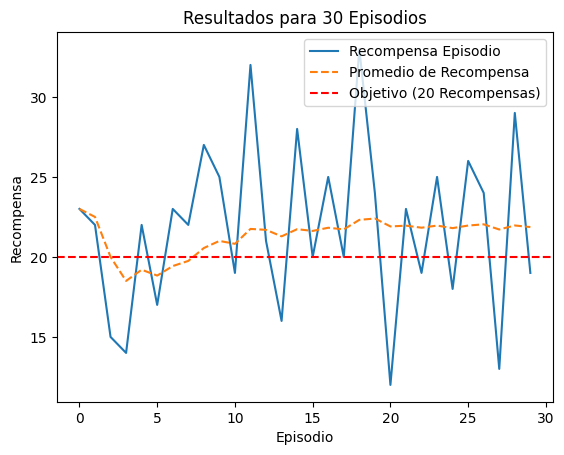

In [53]:
# Plot de los resultados de la evaluación
plot_results(H.history['episode_reward'])

In [43]:
import cv2
import numpy as np
from IPython.display import Video, display
import gym
from collections import deque

# Creamos el video writer para ir almacenando frame por frame
video_path = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video_writer = cv2.VideoWriter(video_path, fourcc, 30, (160, 210))

# Nuevo juego
state = env.reset()

# Creamos un frame stack para ir almacenando 4 frames para nuestra DQN
frames = deque(maxlen=4)
for _ in range(4):
    frames.append(processor.process_observation(state))

done = False
score = 0

while not done:
    # Procesamos nuestro stack con AtariProcessor
    state_batch = processor.process_state_batch(np.stack(frames, axis=0))
    state_batch = np.expand_dims(state_batch, axis=0)

    # Predicimos la siguiente acción y hacemos un step
    action = np.argmax(dqn.model.predict(state_batch)[0])
    state, reward, done, info = env.step(action)

    # Sumamos score y guardamos el nuevo frame
    score += processor.process_reward(reward)
    frames.append(processor.process_observation(state))

    # Render del frame y lo agregamos al video
    frame = env.render(mode='rgb_array')
    video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

video_writer.release()
env.close()

print(f"Gameplay generado en {video_path}")
print(f"Score final: {score}")

Gameplay generado en output_video.mp4
Score final: 32.0


#### 3. Justificación de los parámetros seleccionados y de los resultados obtenidos

**Modelo 1:**

Red neuronal: 3 capas convolucionales con un kernel de 3x3 en cada capa y stride diferenciado. Total de parámetros a entrenar = 2.157.350

Policy: DQN utilizando el algoritmo MaxBoltzmannQPolicy.

Steps de entrenamiento: **1.930.000**

Resultados en test (promedio): **13,6**

Conclusiones: El agente tiene un comportamiento muy aleatorio y puede llegar en entrenamiento a obtener recompensas por encima de los 30 puntos pero también puede llegar a un mínimo de 2 puntos. La mejora en la red neuronal con respecto al ejemplo de clase no hizo una gran diferencia y se entiende que se debe al uso del algortimo MaxBoltzmannQPolicy la cual es una combinación de eps-greedy (acción aleatoria basada en epsilon) y Boltzman q-policy (Probabilidad basada en q).

Anexo 1: Imágenes de la red neuronal, resultados en entrenamiento y test.


**Modelo 2:**

Red neuronal: 3 capas convolucionales, con los siguientes detalles:
- Primera Capa Convolucional:
Kernel: 8x8.
Strides: 4X4

- Segunda Capa Convolucional:
Kernel: 4x4.
Strides: 2X2

- Tercera Capa Convolucional:
Kernel: 3x3.
Strides: 1X1


Total de parámetros a entrenar = 34,812,326

Policy: DQN utilizando el algoritmo EpsGreedyQPolicy.

Steps de entrenamiento: **5.000**

Resultados en test (promedio): **18.97**

*Conclusiones:*
- El agente tiene un rendimiento variado con recompensas que oscilan entre 5 y 30. Esto indica cierta eficacia en el aprendizaje, pero con espacio para mejorar la consistencia.
- El rendimiento promedio está cerca del objetivo de 20, lo cual es positivo, pero la meta es alcanzar o superar consistentemente este puntaje.
- La policy de exploración actual parece adecuada, pero se podría experimentar con los parámetros de LinearAnnealedPolicy y EpsGreedyQPolicy para optimizar aún más el equilibrio entre exploración y explotación.
- La arquitectura de la red es apropiada, aunque siempre hay espacio para experimentación.
- Como objetivo de equipo, se plantea realizar ajustes en la arquitectura del modelo y en la estrategia de entrenamiento para lograr un rendimiento más consistente y fiable que alcance de manera regular nuestro objetivo de puntaje.

Anexo 2: Imágenes de la red neuronal, resultados en entrenamiento y test.

**Modelo 3:**

Red neuronal: 3 capas convolucionales con un kernel de 3x3 en cada capa y stride diferenciado. Total de parámetros a entrenar = 508,006

Policy: DQN utilizando el algoritmo MaxBoltzmannQPolicy.

Steps de entrenamiento: **1.750.000**

Resultados en test (promedio): **+20**

Conclusiones: Se trata del modelo realizado en la clase, sin ninguna modificación y que se realizó en primera instancia para hacer pruebas. Finalmente parece ser el que mejor resultado ha dado, superando la recompensa de 20 de media. Aún así, al no presentar ninguna característica original se ha optado por entregar el modelo que presentamos a continuación.

Anexo 3: Imágenes de la red neuronal, resultados en entrenamiento y test.

**Modelo Final**




Red neuronal: 3 capas convolucionales, con los siguientes detalles:

- Primera Capa Convolucional: Kernel: 3 x 3. Strides: 3X3

- Segunda Capa Convolucional: Kernel: 3 x 3. Strides: 1X1

- Tercera Capa Convolucional: Kernel: 3x3. Strides: 1X1

Dos capas densas de 512 perceptrones.

Total de parámetros a entrenar = 949,606

Policy: DQN utilizando el algoritmo EpsGreedyQPolicy modificado.

La modificación ha consistido en hacer que el epsilon descienda poco a poco. Por este motivo no se ha fijado el parámetro *nb_steps_warmup* en la función de entrenamiento, puesto que la exploración se ha hecho progresivamente según se avanzaba en el entrenamiento.

Para el preprocesamiento de las observaciones se ha tratado de hacer un crop de esta para enviar a la red neuronal solo la información del juego, eliminando el score y el suelo de abajo.

Steps de entrenamiento: **2.000.000**

Resultados en test (promedio): **20.30**

*Conclusiones:*
- El agente tiene un rendimiento variado con recompensas que oscilan entre 11 y 34. Esto indica cierta eficacia en el aprendizaje, pero con espacio para mejorar la consistencia. Otros experimentos realizados por el grupo utilizando una red neuronal con más parámetros han presentado resultados parejos con menos steps.
- El rendimiento promedio está cerca del objetivo de 20, lo cual es positivo, pero la meta es alcanzar o superar consistentemente este puntaje.
- La policy de exploración actual parece adecuada, pero la mejora sobre el valor del epsilon no ha presentado el rendimiento que se esperaba, quedando un promedio de recompensa por debajo del objetivo.
- En la arquitectura de la red se ha optado por una red simple, sin un número elevado de parámetros para que el rendimiento fuera mejor. Esto puede haber sido un error, ya que como se ha comentado arriba, otros experimentos con RN más grandes hhan presentado un resultado similar.- Como objetivo de equipo, se plantea realizar ajustes en la arquitectura del modelo y en la estrategia de entrenamiento para lograr un rendimiento más consistente y fiable que alcance de manera regular nuestro objetivo de puntaje.

*Conclusiones finales*

Recopilando todos los experimentos realizados, podemos apreciar, aunque no afirmar rotundamente los siguentes puntos.

    - Una red neuronal pesada puede dar mejores resultados con menos steps, lo que podría compensar el coste en tiempo del Backpropagation de la red.
    - Hacer un crop de la observación y reducir el epsilon progresivamente no han supuesto una mejora notable, por lo que en un nuevo intento se podrian evitar estos pasos y trabajar de una manera más estandard.

---